<a href="https://colab.research.google.com/github/paulorfbr/transformers_course/blob/machine_translation/MachineTranslation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine translation - BLEU (Bilingual Evaluation Understudy)**

In [5]:
!pip install transformers

In [6]:
from transformers import pipeline
translator=pipeline('translation', model='Helsinki-NLP/opus-mt-tc-big-en-pt')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/465M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/825k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [7]:
translator('I like eggs and ham')

[{'translation_text': 'Gosto de ovos e presunto'}]

**Comparing translation quality**

In [ ]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2024-02-22 15:37:47--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  13.1MB/s    in 0.2s    

2024-02-22 15:37:47 (13.1 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [ ]:
!unzip -nq spa-eng.zip

In [3]:
!ls

sample_data  spa-eng  spa-eng.zip


In [4]:
ls spa-eng

_about.txt  spa.txt


In [8]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [9]:
# compile eng-spa translations
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  eng, spa = line.split("\t")
  if eng not in eng2spa:
    eng2spa[eng] = []
  eng2spa[eng].append(spa)

In [10]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [11]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [12]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [13]:
tokenizer.tokenize('¿Qué me cuentas?'.lower())

['qué', 'me', 'cuentas']

In [14]:
tokens = tokenizer.tokenize('¿Qué me cuentas?'.lower())
sentence_bleu([tokens], tokens)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [15]:
sentence_bleu([['hi']], ['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [22]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [23]:
sentence_bleu(['hi there'.split()], 'hi there'.split(), smoothing_function=smoother.method4)

0.2213885886251307

In [24]:
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split(), smoothing_function=smoother.method4)

0.5757197301274735

In [25]:
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [26]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] = spa_list_tokens

In [27]:
!pip install transformers sentencepiece transformers[sentencepiece]

In [28]:
translator = pipeline("translation",
                      model='Helsinki-NLP/opus-mt-en-es', device=0)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [29]:
translator("I like eggs and ham")

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [31]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [33]:
eng_phrases_subset = eng_phrases[30_000:31_000]
len(eng_phrases_subset)

1000

In [34]:
# 27 min for 10k phrases on GPU
translations = translator(eng_phrases_subset)

In [35]:
translations[0]

{'translation_text': 'El policía estaba borracho.'}

In [45]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
  matches = eng2spa_tokens[eng]

  # tokenize translation
  spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

  score = sentence_bleu(matches, spa_pred)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

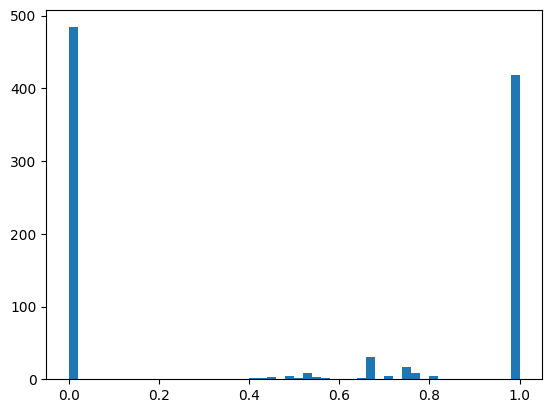

In [46]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50);

In [47]:
import numpy as np
np.mean(scores)

0.48241431971540266

In [41]:
np.random.seed(1)

def print_random_translation():
  i = np.random.choice(len(eng_phrases_subset))
  eng = eng_phrases_subset[i]
  print("EN:", eng)

  translation = translations[i]['translation_text']
  print("ES Translation:", translation)

  matches = eng2spa[eng]
  print("Matches:", matches)

In [42]:
print_random_translation()

EN: The trip was really fun.
ES Translation: El viaje fue muy divertido.
Matches: ['El viaje fue verdaderamente divertido.']


In [43]:
print_random_translation()

EN: Tom built his own house.
ES Translation: Tom construyó su propia casa.
Matches: ['Tom construyó su propia casa.']


In [44]:
print_random_translation()

EN: Where is this guy going?
ES Translation: ¿A dónde va este tipo?
Matches: ['¿Dónde va este tipo?']
